In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import argparse
import os

In [3]:
from google.colab import drive 
drive.mount('/content/drive/')

Mounted at /content/drive/


In [4]:
#setting root dir for project
rootdir = '/content/drive/My Drive/Mask Detector/Face Mask Detection/'

In [5]:
#setting parameters
dataset = rootdir + 'dataset'
plotpath = 'out_{}_batch.png'
modelpath = rootdir + 'mask_detector_{}_batch_stgd.model'

In [6]:
def preprocess(x):
  if not issubclass(x.dtype.type, np.floating):
    x = x.astype(backend.floatx(), copy=False)
  x /= 127.5
  x -= 1.0
  return x

In [7]:
# grab the list of images in our dataset directory, then initialize
# the list of data (i.e., images) and class images
print("[INFO] loading images...")
imagePaths = list(paths.list_images(dataset))
data = []
labels = []
i = 0;
print(len(imagePaths))
# loop over the image paths
for imagePath in imagePaths:
  label = imagePath.split(os.path.sep)[-2]
  print('proessing ' + str(i))
  i = i + 1
  # load the input image (224x224) and preprocess it
  image = load_img(imagePath, target_size=(224, 224))
  image = img_to_array(image)
  image = preprocess(image)
  # update the data and labels lists, respectively
  data.append(image)
  labels.append(label)

[INFO] loading images...
3846
proessing 0
proessing 1
proessing 2
proessing 3
proessing 4
proessing 5
proessing 6
proessing 7
proessing 8
proessing 9
proessing 10
proessing 11
proessing 12
proessing 13
proessing 14
proessing 15
proessing 16
proessing 17
proessing 18
proessing 19
proessing 20
proessing 21
proessing 22
proessing 23
proessing 24
proessing 25
proessing 26
proessing 27
proessing 28
proessing 29
proessing 30
proessing 31
proessing 32
proessing 33
proessing 34
proessing 35
proessing 36
proessing 37
proessing 38
proessing 39
proessing 40
proessing 41
proessing 42
proessing 43
proessing 44
proessing 45
proessing 46
proessing 47
proessing 48
proessing 49
proessing 50
proessing 51
proessing 52
proessing 53
proessing 54
proessing 55
proessing 56
proessing 57
proessing 58
proessing 59
proessing 60
proessing 61
proessing 62
proessing 63
proessing 64
proessing 65
proessing 66
proessing 67
proessing 68
proessing 69
proessing 70
proessing 71
proessing 72
proessing 73
proessing 74
proes

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


proessing 356
proessing 357
proessing 358
proessing 359
proessing 360
proessing 361
proessing 362
proessing 363
proessing 364
proessing 365
proessing 366
proessing 367
proessing 368
proessing 369
proessing 370
proessing 371
proessing 372
proessing 373
proessing 374
proessing 375
proessing 376
proessing 377
proessing 378
proessing 379
proessing 380
proessing 381
proessing 382
proessing 383
proessing 384
proessing 385
proessing 386
proessing 387
proessing 388
proessing 389
proessing 390
proessing 391
proessing 392
proessing 393
proessing 394
proessing 395
proessing 396
proessing 397
proessing 398
proessing 399
proessing 400
proessing 401
proessing 402
proessing 403
proessing 404
proessing 405
proessing 406
proessing 407
proessing 408
proessing 409
proessing 410
proessing 411
proessing 412
proessing 413
proessing 414
proessing 415
proessing 416
proessing 417
proessing 418
proessing 419
proessing 420
proessing 421
proessing 422
proessing 423
proessing 424
proessing 425
proessing 426
proess

In [8]:
# convert the data and labels to NumPy arrays
print(data)
data = np.array(data, dtype="float32")
labels = np.array(labels)
print(data)


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[[[[ 0.43529415  0.02745104 -0.26274508]
   [ 0.43529415  0.02745104 -0.26274508]
   [ 0.41960788  0.01176476 -0.27843136]
   ...
   [-0.38039213 -0.6784314  -0.78039217]
   [-0.30196077 -0.58431375 -0.69411767]
   [-0.30196077 -0.58431375 -0.69411767]]

  [[ 0.4431373   0.0196079  -0.24705881]
   [ 0.4431373   0.0196079  -0.24705881]
   [ 0.35686278 -0.06666666 -0.3333333 ]
   ...
   [-0.24705881 -0.54509807 -0.64705884]
   [-0.34117645 -0.62352943 -0.73333335]
   [-0.34117645 -0.62352943 -0.73333335]]

  [[ 0.45098042 -0.01176471 -0.26274508]
   [ 0.45098042 -0.01176471 -0.26274508]
   [ 0.26274514 -0.17647058 -0.4352941 ]
   ...
   [-0.19999999 -0.4823529  -0.5921569 ]
   [-0.34117645 -0.62352943 -0.73333335]
   [-0.34117645 -0.62352943 -0.73333335]]

  ...

  [[-0.77254903 -0.84313726 -0.8352941 ]
   [-0.77254903 -0.84313726 -0.8352941 ]
   [-0.7647059  -0.8352941  -0.827451  ]
   ...
   [ 0.7490196   0.13725495 -0.16862744]
   [ 0.7411765   0.12941182 -0.17647058]
   [ 0.7411765  

In [9]:
print(labels)

['with_mask' 'with_mask' 'with_mask' ... 'without_mask' 'without_mask'
 'without_mask']


In [10]:
# perform one-hot encoding on the labels
lb = LabelBinarizer()
labels = lb.fit_transform(labels)
labels = to_categorical(labels)
print(labels)

[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [11]:
# partition the data into training and testing splits using 80% of
# the data for training and the remaining 20% for testing
(trainX, testX, trainY, testY) = train_test_split(data, labels, test_size=0.20, stratify=labels, random_state=42)

In [11]:
def load_train_save(EPOCHS,BS,dataset,labels,num_l,trainX, testX, trainY, testY):
  aug = ImageDataGenerator(
	rotation_range=20,
	zoom_range=0.15,
	width_shift_range=0.2,
	height_shift_range=0.2,
	shear_range=0.15,
	horizontal_flip=True,
	fill_mode="nearest")
  # load the MobileNetV2 network, ensuring the head FC layer sets are
  # left off
  baseModel = MobileNetV2(weights="imagenet", include_top=False,input_tensor=Input(shape=(224, 224, 3)))
  # construct the head of the model that will be placed on top of the
  # the base model
  headModel = baseModel.output
  headModel = AveragePooling2D(pool_size=(7, 7))(headModel)
  headModel = Flatten(name="flatten")(headModel)
  headModel = Dense(128, activation="relu")(headModel)
  headModel = Dense(2, activation="softmax")(headModel)

  # place the head FC model on top of the base model (this will become
  # the actual model we will train)
  model = Model(inputs=baseModel.input, outputs=headModel)

  # loop over layers
  indx = 0
  for layer in baseModel.layers:
    if indx > len(baseModel.layers) - num_l - 1:
      layer.trainable = True
    else:
      layer.trainable = False
    indx = indx + 1

  # compile our model
  print("[INFO] compiling model...")
  algo = SGD(learning_rate=0.0001)
  model.compile(algo, "binary_crossentropy", metrics=["accuracy"])
  print("[INFO] training ...")
  history = model.fit( aug.flow(trainX, trainY, batch_size=BS), steps_per_epoch=len(trainX) / BS, validation_data=(testX, testY),validation_steps=len(testX) / BS, epochs=EPOCHS)
  
  

  # serialize the model to drive
  modelpath = rootdir + 'mask_detector_' + str(EPOCHS) +'_EP_' + str(BS) + '_' + str(num_l) +'.model'
  model.save(modelpath, save_format="h5")

  return history,model


In [12]:
def plotter(EPOCHS,BS,history,testX,testY,model,num_l):
  # make predictions on the testing set
  print("[INFO] evaluating network...")
  predIdxs = model.predict(testX, batch_size=BS)

  # for each image in the testing set we need to find the index of the
  # label with corresponding largest predicted probability
  predIdxs = np.argmax(predIdxs, axis=1)

  # show a nicely formatted classification report
  print(classification_report(testY.argmax(axis=1), predIdxs, target_names=lb.classes_))
  #plot
  N = EPOCHS
  plt.style.use("ggplot")
  plt.figure()
  plt.plot(np.arange(0, N), history.history["loss"], label="train_loss")
  plt.plot(np.arange(0, N), history.history["val_loss"], label="val_loss")
  plt.plot(np.arange(0, N), history.history["accuracy"], label="train_acc")
  plt.plot(np.arange(0, N), history.history["val_accuracy"], label="val_acc")
  plt.title("Training Loss and Accuracy")
  plt.xlabel("Epoch #")
  plt.ylabel("Loss/Accuracy")
  plt.legend(loc="lower left")
  plotpath = rootdir + 'plot_' + str(EPOCHS) +'_EP_' + str(BS) + '_' + str(num_l) + '.png'
  plt.savefig(plotpath.format(BS))

In [13]:
history_map = {}

In [ ]:
H,model = load_train_save(50,1,data,labels,0,trainX,testX,trainY,testY)
history_map[1] = H


[INFO] compiling model...
[INFO] training ...
Epoch 1/50
3076/3076 [==============================] - 213s 69ms/step - loss: 0.3119 - accuracy: 0.8950 - val_loss: 0.1458 - val_accuracy: 0.9662
Epoch 2/50
3076/3076 [==============================] - 205s 67ms/step - loss: 0.1297 - accuracy: 0.9685 - val_loss: 0.0977 - val_accuracy: 0.9753
Epoch 3/50
3076/3076 [==============================] - 205s 67ms/step - loss: 0.0917 - accuracy: 0.9740 - val_loss: 0.0784 - val_accuracy: 0.9805
Epoch 4/50
3076/3076 [==============================] - 208s 68ms/step - loss: 0.0772 - accuracy: 0.9779 - val_loss: 0.0706 - val_accuracy: 0.9805
Epoch 5/50
3076/3076 [==============================] - 208s 68ms/step - loss: 0.0676 - accuracy: 0.9789 - val_loss: 0.0630 - val_accuracy: 0.9805
Epoch 6/50
3076/3076 [==============================] - 211s 69ms/step - loss: 0.0605 - accuracy: 0.9811 - val_loss: 0.0595 - val_accuracy: 0.9805
Epoch 7/50
3076/3076 [==============================] - 218s 71ms/step -

[INFO] evaluating network...
              precision    recall  f1-score   support

   with_mask       0.99      0.99      0.99       384
without_mask       0.99      0.99      0.99       386

    accuracy                           0.99       770
   macro avg       0.99      0.99      0.99       770
weighted avg       0.99      0.99      0.99       770



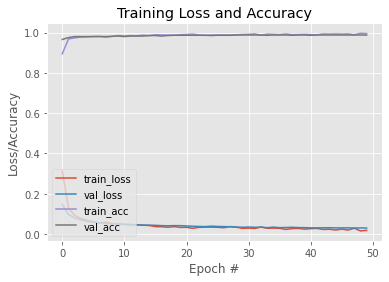

In [ ]:
plotter(50,1,H,testX,testY,model)

In [ ]:
H,model = load_train_save(50,16,data,labels,0,trainX,testX,trainY,testY)
history_map[16] = H


9412608/9406464 [==============================] - 0s 0us/step
[INFO] compiling model...
[INFO] training ...
Epoch 1/50
193/192 [==============================] - 159s 823ms/step - loss: 0.6728 - accuracy: 0.6265 - val_loss: 0.5604 - val_accuracy: 0.7286
Epoch 2/50
193/192 [==============================] - 158s 821ms/step - loss: 0.5211 - accuracy: 0.7646 - val_loss: 0.4878 - val_accuracy: 0.7857
Epoch 3/50
193/192 [==============================] - 158s 818ms/step - loss: 0.4365 - accuracy: 0.8270 - val_loss: 0.4243 - val_accuracy: 0.8299
Epoch 4/50
193/192 [==============================] - 158s 818ms/step - loss: 0.3857 - accuracy: 0.8579 - val_loss: 0.3750 - val_accuracy: 0.8532
Epoch 5/50
193/192 [==============================] - 159s 823ms/step - loss: 0.3412 - accuracy: 0.8813 - val_loss: 0.3362 - val_accuracy: 0.8753
Epoch 6/50
193/192 [==============================] - 159s 823ms/step - loss: 0.3007 - accuracy: 0.9112 - val_loss: 0.3068 - val_accuracy: 0.8857
Epoch 7/50
193/

[INFO] evaluating network...
              precision    recall  f1-score   support

   with_mask       0.98      0.98      0.98       384
without_mask       0.98      0.98      0.98       386

    accuracy                           0.98       770
   macro avg       0.98      0.98      0.98       770
weighted avg       0.98      0.98      0.98       770



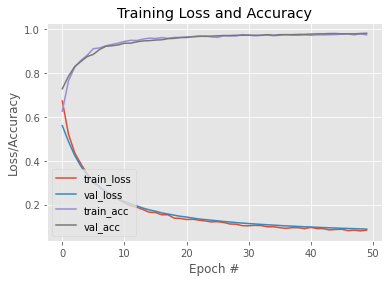

In [ ]:

plotter(50,16,history_map[16],testX,testY,model)

In [ ]:
#serializing history map into a file for later use
import pickle
history_file = open(rootdir + 'history_sgd_16_ly_0', 'wb') 
pickle.dump(history_map[16].history, history_file) 
history_file.close()

In [ ]:
H,model = load_train_save(50,32,data,labels,0,trainX,testX,trainY,testY)
history_map[32] = H


9412608/9406464 [==============================] - 0s 0us/step
[INFO] compiling model...
[INFO] training ...
Epoch 1/50
97/96 [==============================] - 151s 2s/step - loss: 0.7714 - accuracy: 0.4883 - val_loss: 0.7338 - val_accuracy: 0.5416
Epoch 2/50
97/96 [==============================] - 149s 2s/step - loss: 0.6890 - accuracy: 0.5767 - val_loss: 0.6611 - val_accuracy: 0.6260
Epoch 3/50
97/96 [==============================] - 151s 2s/step - loss: 0.6178 - accuracy: 0.6645 - val_loss: 0.6024 - val_accuracy: 0.6948
Epoch 4/50
97/96 [==============================] - 150s 2s/step - loss: 0.5713 - accuracy: 0.7276 - val_loss: 0.5520 - val_accuracy: 0.7416
Epoch 5/50
97/96 [==============================] - 150s 2s/step - loss: 0.5235 - accuracy: 0.7728 - val_loss: 0.5090 - val_accuracy: 0.7805
Epoch 6/50
97/96 [==============================] - 150s 2s/step - loss: 0.4803 - accuracy: 0.8189 - val_loss: 0.4720 - val_accuracy: 0.8130
Epoch 7/50
97/96 [===========================

[INFO] evaluating network...
              precision    recall  f1-score   support

   with_mask       0.98      0.98      0.98       384
without_mask       0.98      0.98      0.98       386

    accuracy                           0.98       770
   macro avg       0.98      0.98      0.98       770
weighted avg       0.98      0.98      0.98       770



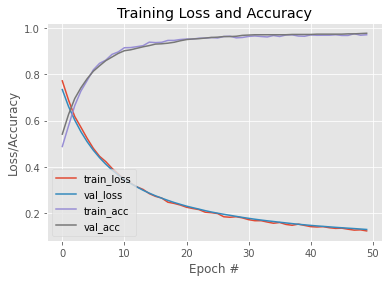

In [ ]:
plotter(50,32,H,testX,testY,model)

In [ ]:
#serializing history map into a file for later use
import pickle
history_file = open(rootdir + 'history_sgd_32_ly_0', 'wb') 
pickle.dump(history_map[32].history, history_file) 
history_file.close()

In [ ]:
H,model = load_train_save(50,1,data,labels,1,trainX,testX,trainY,testY)
history_map[1] = H


[INFO] compiling model...
[INFO] training ...
Epoch 1/50
3076/3076 [==============================] - 215s 70ms/step - loss: 0.2986 - accuracy: 0.9028 - val_loss: 0.1700 - val_accuracy: 0.9597
Epoch 2/50
3076/3076 [==============================] - 212s 69ms/step - loss: 0.1274 - accuracy: 0.9701 - val_loss: 0.1148 - val_accuracy: 0.9675
Epoch 3/50
3076/3076 [==============================] - 213s 69ms/step - loss: 0.0926 - accuracy: 0.9753 - val_loss: 0.0949 - val_accuracy: 0.9753
Epoch 4/50
3076/3076 [==============================] - 212s 69ms/step - loss: 0.0762 - accuracy: 0.9772 - val_loss: 0.0835 - val_accuracy: 0.9779
Epoch 5/50
3076/3076 [==============================] - 213s 69ms/step - loss: 0.0656 - accuracy: 0.9792 - val_loss: 0.0765 - val_accuracy: 0.9766
Epoch 6/50
3076/3076 [==============================] - 210s 68ms/step - loss: 0.0627 - accuracy: 0.9824 - val_loss: 0.0738 - val_accuracy: 0.9766
Epoch 7/50
3076/3076 [==============================] - 211s 69ms/step -

[INFO] evaluating network...
              precision    recall  f1-score   support

   with_mask       0.98      0.99      0.99       384
without_mask       0.99      0.98      0.99       386

    accuracy                           0.99       770
   macro avg       0.99      0.99      0.99       770
weighted avg       0.99      0.99      0.99       770



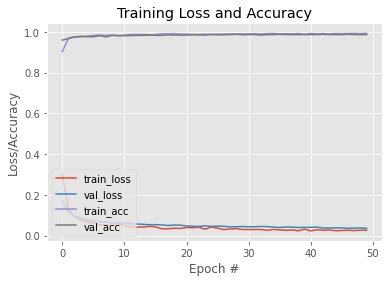

In [ ]:
plotter(50,1,H,testX,testY,model)

In [ ]:
#serializing history map into a file for later use
import pickle
history_file = open(rootdir + 'history_sgd_1_ly_1', 'wb') 
pickle.dump(history_map[1].history, history_file) 
history_file.close()

In [ ]:
H,model = load_train_save(50,16,data,labels,1,trainX,testX,trainY,testY)
history_map[16] = H


9412608/9406464 [==============================] - 0s 0us/step
[INFO] compiling model...
[INFO] training ...
Epoch 1/50
193/192 [==============================] - 154s 796ms/step - loss: 0.6511 - accuracy: 0.6346 - val_loss: 0.5937 - val_accuracy: 0.6948
Epoch 2/50
193/192 [==============================] - 152s 788ms/step - loss: 0.5110 - accuracy: 0.7633 - val_loss: 0.4831 - val_accuracy: 0.7961
Epoch 3/50
193/192 [==============================] - 153s 790ms/step - loss: 0.4076 - accuracy: 0.8453 - val_loss: 0.4094 - val_accuracy: 0.8455
Epoch 4/50
193/192 [==============================] - 152s 788ms/step - loss: 0.3678 - accuracy: 0.8664 - val_loss: 0.3555 - val_accuracy: 0.8779
Epoch 5/50
193/192 [==============================] - 152s 787ms/step - loss: 0.3195 - accuracy: 0.8917 - val_loss: 0.3162 - val_accuracy: 0.9013
Epoch 6/50
193/192 [==============================] - 152s 786ms/step - loss: 0.2875 - accuracy: 0.9025 - val_loss: 0.2863 - val_accuracy: 0.9130
Epoch 7/50
193/

[INFO] evaluating network...
              precision    recall  f1-score   support

   with_mask       0.97      0.98      0.98       384
without_mask       0.98      0.97      0.98       386

    accuracy                           0.98       770
   macro avg       0.98      0.98      0.98       770
weighted avg       0.98      0.98      0.98       770



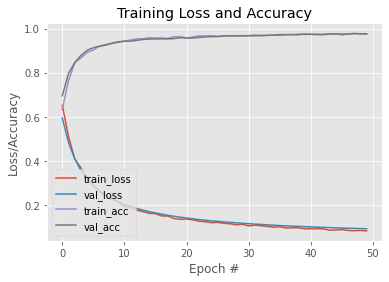

In [ ]:
plotter(50,16,H,testX,testY,model,1)

In [ ]:
#serializing history map into a file for later use
import pickle
history_file = open(rootdir + 'history_sgd_16_ly_1', 'wb') 
pickle.dump(history_map[16].history, history_file) 
history_file.close()

In [ ]:
H,model = load_train_save(50,32,data,labels,1,trainX,testX,trainY,testY)
history_map[32] = H


[INFO] compiling model...
[INFO] training ...
Epoch 1/50
97/96 [==============================] - 150s 2s/step - loss: 0.8587 - accuracy: 0.4909 - val_loss: 0.8350 - val_accuracy: 0.4987
Epoch 2/50
97/96 [==============================] - 148s 2s/step - loss: 0.6740 - accuracy: 0.6135 - val_loss: 0.7061 - val_accuracy: 0.5766
Epoch 3/50
97/96 [==============================] - 147s 2s/step - loss: 0.5934 - accuracy: 0.6960 - val_loss: 0.6226 - val_accuracy: 0.6662
Epoch 4/50
97/96 [==============================] - 148s 2s/step - loss: 0.5207 - accuracy: 0.7542 - val_loss: 0.5609 - val_accuracy: 0.7403
Epoch 5/50
97/96 [==============================] - 148s 2s/step - loss: 0.4850 - accuracy: 0.7945 - val_loss: 0.5103 - val_accuracy: 0.7883
Epoch 6/50
97/96 [==============================] - 147s 2s/step - loss: 0.4422 - accuracy: 0.8241 - val_loss: 0.4699 - val_accuracy: 0.8182
Epoch 7/50
97/96 [==============================] - 147s 2s/step - loss: 0.4000 - accuracy: 0.8618 - val_los

[INFO] evaluating network...
              precision    recall  f1-score   support

   with_mask       0.96      0.98      0.97       384
without_mask       0.98      0.96      0.97       386

    accuracy                           0.97       770
   macro avg       0.97      0.97      0.97       770
weighted avg       0.97      0.97      0.97       770



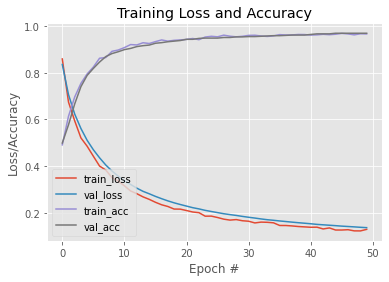

In [ ]:
plotter(50,32,H,testX,testY,model,1)

In [ ]:
#serializing history map into a file for later use
import pickle
history_file = open(rootdir + 'history_sgd_32_ly_1', 'wb') 
pickle.dump(history_map[32].history, history_file) 
history_file.close()

In [16]:
def load_train_save(EPOCHS,BS,dataset,labels,num_l,trainX, testX, trainY, testY):
  aug = ImageDataGenerator(
	rotation_range=20,
	zoom_range=0.15,
	width_shift_range=0.2,
	height_shift_range=0.2,
	shear_range=0.15,
	horizontal_flip=True,
	fill_mode="nearest")
  # load the MobileNetV2 network, ensuring the head FC layer sets are
  # left off
  baseModel = MobileNetV2(weights="imagenet", include_top=False,input_tensor=Input(shape=(224, 224, 3)))
  # construct the head of the model that will be placed on top of the
  # the base model
  headModel = baseModel.output
  headModel = AveragePooling2D(pool_size=(7, 7))(headModel)
  headModel = Flatten(name="flatten")(headModel)
  headModel = Dense(128, activation="relu")(headModel)
  headModel = Dense(2, activation="softmax")(headModel)

  # place the head FC model on top of the base model (this will become
  # the actual model we will train)
  model = Model(inputs=baseModel.input, outputs=headModel)

  # loop over layers
  indx = 0
  for layer in baseModel.layers:
    layer.trainable = True
    indx = indx + 1

  # compile our model
  print("[INFO] compiling model...")
  algo = SGD(learning_rate=0.0001)
  model.compile(algo, "binary_crossentropy", metrics=["accuracy"])
  print("[INFO] training ...")
  history = model.fit( aug.flow(trainX, trainY, batch_size=BS), steps_per_epoch=len(trainX) / BS, validation_data=(testX, testY),validation_steps=len(testX) / BS, epochs=EPOCHS)
  
  

  # serialize the model to drive
  modelpath = rootdir + 'mask_detector_all_' + str(EPOCHS) +'_EP_' + str(BS) + '_' + str(num_l) +'.model'
  model.save(modelpath, save_format="h5")

  return history,model


In [28]:
H,model = load_train_save(20,32,data,labels,1,trainX,testX,trainY,testY)
history_map[32] = H


[INFO] compiling model...
[INFO] training ...
Epoch 1/20
97/96 [==============================] - 633s 7s/step - loss: 0.7216 - accuracy: 0.5410 - val_loss: 0.7585 - val_accuracy: 0.4909
Epoch 2/20
97/96 [==============================] - 628s 6s/step - loss: 0.6353 - accuracy: 0.6391 - val_loss: 0.6764 - val_accuracy: 0.6013
Epoch 3/20
97/96 [==============================] - 633s 7s/step - loss: 0.5680 - accuracy: 0.6840 - val_loss: 0.6102 - val_accuracy: 0.6753
Epoch 4/20
97/96 [==============================] - 648s 7s/step - loss: 0.4997 - accuracy: 0.7572 - val_loss: 0.5521 - val_accuracy: 0.7351
Epoch 5/20
97/96 [==============================] - 623s 6s/step - loss: 0.4492 - accuracy: 0.8095 - val_loss: 0.5024 - val_accuracy: 0.7649
Epoch 6/20
97/96 [==============================] - 626s 6s/step - loss: 0.4121 - accuracy: 0.8391 - val_loss: 0.4577 - val_accuracy: 0.8000
Epoch 7/20
97/96 [==============================] - 626s 6s/step - loss: 0.3850 - accuracy: 0.8560 - val_los

In [15]:
def plotter(EPOCHS,BS,history,testX,testY,model,num_l):
  # make predictions on the testing set
  print("[INFO] evaluating network...")
  predIdxs = model.predict(testX, batch_size=BS)

  # for each image in the testing set we need to find the index of the
  # label with corresponding largest predicted probability
  predIdxs = np.argmax(predIdxs, axis=1)

  # show a nicely formatted classification report
  print(classification_report(testY.argmax(axis=1), predIdxs, target_names=lb.classes_))
  #plot
  N = EPOCHS
  plt.style.use("ggplot")
  plt.figure()
  plt.plot(np.arange(0, N), history.history["loss"], label="train_loss")
  plt.plot(np.arange(0, N), history.history["val_loss"], label="val_loss")
  plt.plot(np.arange(0, N), history.history["accuracy"], label="train_acc")
  plt.plot(np.arange(0, N), history.history["val_accuracy"], label="val_acc")
  plt.title("Training Loss and Accuracy")
  plt.xlabel("Epoch #")
  plt.ylabel("Loss/Accuracy")
  plt.legend(loc="lower left")
  plotpath = rootdir + 'plot_all_ly_' + str(EPOCHS) +'_EP_' + str(BS) + '_' + str(num_l) + '.png'
  plt.savefig(plotpath.format(BS))

[INFO] evaluating network...
              precision    recall  f1-score   support

   with_mask       0.98      0.93      0.95       384
without_mask       0.93      0.98      0.95       386

    accuracy                           0.95       770
   macro avg       0.95      0.95      0.95       770
weighted avg       0.95      0.95      0.95       770



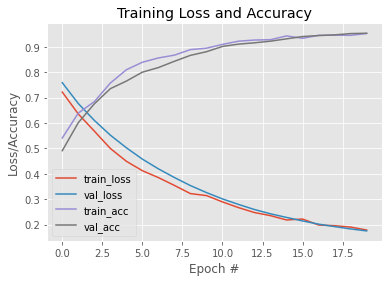

In [30]:
plotter(20,32,H,testX,testY,model,1)

In [31]:
#serializing history map into a file for later use
import pickle
history_file = open(rootdir + 'history_all_32', 'wb') 
pickle.dump(history_map[16].history, history_file) 
history_file.close()

In [17]:
H,model = load_train_save(50,32,data,labels,1,trainX,testX,trainY,testY)
history_map[32] = H


[INFO] compiling model...
[INFO] training ...
Epoch 1/50
97/96 [==============================] - 653s 7s/step - loss: 0.6941 - accuracy: 0.5608 - val_loss: 0.7621 - val_accuracy: 0.5597
Epoch 2/50
97/96 [==============================] - 652s 7s/step - loss: 0.6279 - accuracy: 0.6369 - val_loss: 0.6967 - val_accuracy: 0.6026
Epoch 3/50
97/96 [==============================] - 644s 7s/step - loss: 0.5631 - accuracy: 0.7272 - val_loss: 0.6364 - val_accuracy: 0.6481
Epoch 4/50
97/96 [==============================] - 647s 7s/step - loss: 0.5218 - accuracy: 0.7734 - val_loss: 0.5844 - val_accuracy: 0.6714
Epoch 5/50
97/96 [==============================] - 649s 7s/step - loss: 0.4820 - accuracy: 0.8043 - val_loss: 0.5380 - val_accuracy: 0.6987
Epoch 6/50
97/96 [==============================] - 659s 7s/step - loss: 0.4388 - accuracy: 0.8414 - val_loss: 0.4924 - val_accuracy: 0.7364
Epoch 7/50
97/96 [==============================] - 652s 7s/step - loss: 0.4123 - accuracy: 0.8641 - val_los

[INFO] evaluating network...
              precision    recall  f1-score   support

   with_mask       0.96      0.99      0.97       384
without_mask       0.99      0.96      0.97       386

    accuracy                           0.97       770
   macro avg       0.97      0.97      0.97       770
weighted avg       0.97      0.97      0.97       770



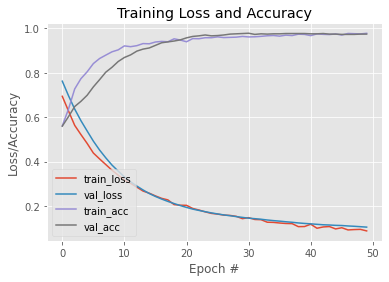

In [18]:
plotter(50,32,H,testX,testY,model,1)

In [22]:
#serializing history map into a file for later use
import pickle
history_file = open(rootdir + 'history_all_32_50_EPOCHS', 'wb') 
pickle.dump(history_map[32].history, history_file) 
history_file.close()

In [12]:
from tensorflow.keras.optimizers import Adam
def load_train_save(EPOCHS,BS,dataset,labels,num_l,trainX, testX, trainY, testY):
  aug = ImageDataGenerator(
	rotation_range=20,
	zoom_range=0.15,
	width_shift_range=0.2,
	height_shift_range=0.2,
	shear_range=0.15,
	horizontal_flip=True,
	fill_mode="nearest")
  # load the MobileNetV2 network, ensuring the head FC layer sets are
  # left off
  baseModel = MobileNetV2(weights="imagenet", include_top=False,input_tensor=Input(shape=(224, 224, 3)))
  # construct the head of the model that will be placed on top of the
  # the base model
  headModel = baseModel.output
  headModel = AveragePooling2D(pool_size=(7, 7))(headModel)
  headModel = Flatten(name="flatten")(headModel)
  headModel = Dense(128, activation="relu")(headModel)
  headModel = Dense(2, activation="softmax")(headModel)

  # place the head FC model on top of the base model (this will become
  # the actual model we will train)
  model = Model(inputs=baseModel.input, outputs=headModel)

  # loop over layers
  indx = 0
  for layer in baseModel.layers:
    layer.trainable = True
    indx = indx + 1

  # compile our model
  print("[INFO] compiling model...")
  INIT_LR = INIT_LR = 1e-4
  algo = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
  model.compile(algo, "binary_crossentropy", metrics=["accuracy"])
  print("[INFO] training ...")
  history = model.fit( aug.flow(trainX, trainY, batch_size=BS), steps_per_epoch=len(trainX) / BS, validation_data=(testX, testY),validation_steps=len(testX) / BS, epochs=EPOCHS)
  
  

  # serialize the model to drive
  modelpath = rootdir + 'mask_detector_all_Adam_' + str(EPOCHS) +'_EP_' + str(BS) + '_' + str(num_l) +'.model'
  model.save(modelpath, save_format="h5")

  return history,model


In [13]:
def plotter(EPOCHS,BS,history,testX,testY,model,num_l):
  # make predictions on the testing set
  print("[INFO] evaluating network...")
  predIdxs = model.predict(testX, batch_size=BS)

  # for each image in the testing set we need to find the index of the
  # label with corresponding largest predicted probability
  predIdxs = np.argmax(predIdxs, axis=1)

  # show a nicely formatted classification report
  print(classification_report(testY.argmax(axis=1), predIdxs, target_names=lb.classes_))
  #plot
  N = EPOCHS
  plt.style.use("ggplot")
  plt.figure()
  plt.plot(np.arange(0, N), history.history["loss"], label="train_loss")
  plt.plot(np.arange(0, N), history.history["val_loss"], label="val_loss")
  plt.plot(np.arange(0, N), history.history["accuracy"], label="train_acc")
  plt.plot(np.arange(0, N), history.history["val_accuracy"], label="val_acc")
  plt.title("Training Loss and Accuracy")
  plt.xlabel("Epoch #")
  plt.ylabel("Loss/Accuracy")
  plt.legend(loc="lower left")
  plotpath = rootdir + 'plot_all_ly_Adam_' + str(EPOCHS) +'_EP_' + str(BS) + '_' + str(num_l) + '.png'
  plt.savefig(plotpath.format(BS))

In [14]:
H,model = load_train_save(20,32,data,labels,1,trainX,testX,trainY,testY)
history_map[32] = H


9412608/9406464 [==============================] - 0s 0us/step
[INFO] compiling model...
[INFO] training ...
Epoch 1/20
97/96 [==============================] - 615s 6s/step - loss: 0.1191 - accuracy: 0.9532 - val_loss: 0.6444 - val_accuracy: 0.8494
Epoch 2/20
97/96 [==============================] - 613s 6s/step - loss: 0.0212 - accuracy: 0.9928 - val_loss: 0.3885 - val_accuracy: 0.9104
Epoch 3/20
97/96 [==============================] - 611s 6s/step - loss: 0.0224 - accuracy: 0.9925 - val_loss: 0.3860 - val_accuracy: 0.8974
Epoch 4/20
97/96 [==============================] - 610s 6s/step - loss: 0.0113 - accuracy: 0.9971 - val_loss: 0.1956 - val_accuracy: 0.9364
Epoch 5/20
97/96 [==============================] - 610s 6s/step - loss: 0.0085 - accuracy: 0.9974 - val_loss: 0.0878 - val_accuracy: 0.9727
Epoch 6/20
97/96 [==============================] - 609s 6s/step - loss: 0.0081 - accuracy: 0.9974 - val_loss: 0.2051 - val_accuracy: 0.9584
Epoch 7/20
97/96 [===========================

NameError: ignored

[INFO] evaluating network...
              precision    recall  f1-score   support

   with_mask       0.96      1.00      0.98       384
without_mask       1.00      0.96      0.98       386

    accuracy                           0.98       770
   macro avg       0.98      0.98      0.98       770
weighted avg       0.98      0.98      0.98       770



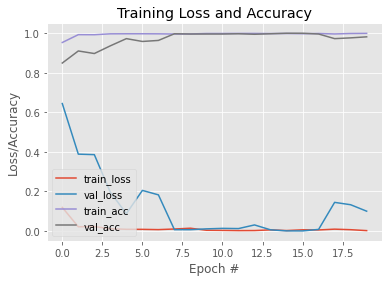

In [15]:
plotter(20,32,H,testX,testY,model,1)

In [17]:
#serializing history map into a file for later use
import pickle
history_file = open(rootdir + 'history_all_32_20_EPOCHS_Adam', 'wb') 
pickle.dump(H.history, history_file) 
history_file.close()

In [21]:
def load_train_save(EPOCHS,BS,dataset,labels,num_l,trainX, testX, trainY, testY):
  aug = ImageDataGenerator(
	rotation_range=20,
	zoom_range=0.15,
	width_shift_range=0.2,
	height_shift_range=0.2,
	shear_range=0.15,
	horizontal_flip=True,
	fill_mode="nearest")
  # load the MobileNetV2 network, ensuring the head FC layer sets are
  # left off
  baseModel = MobileNetV2(weights="imagenet", include_top=False,input_tensor=Input(shape=(224, 224, 3)))
  # construct the head of the model that will be placed on top of the
  # the base model
  headModel = baseModel.output
  headModel = AveragePooling2D(pool_size=(7, 7))(headModel)
  headModel = Flatten(name="flatten")(headModel)
  headModel = Dense(128, activation="relu")(headModel)
  headModel = Dense(2, activation="softmax")(headModel)

  # place the head FC model on top of the base model (this will become
  # the actual model we will train)
  model = Model(inputs=baseModel.input, outputs=headModel)

  # loop over layers
  indx = 0
  for layer in baseModel.layers:
    if indx > len(baseModel.layers) - num_l - 1:
      layer.trainable = True
    else:
      layer.trainable = False
    indx = indx + 1

  # compile our model
  print("[INFO] compiling model...")
  INIT_LR = 1e-4
  algo = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
  model.compile(algo, "binary_crossentropy", metrics=["accuracy"])
  print("[INFO] training ...")
  history = model.fit( aug.flow(trainX, trainY, batch_size=BS), steps_per_epoch=len(trainX) / BS, validation_data=(testX, testY),validation_steps=len(testX) / BS, epochs=EPOCHS)
  
  

  # serialize the model to drive
  modelpath = rootdir + 'mask_detector_Adam_' + str(EPOCHS) +'_EP_' + str(BS) + '_' + str(num_l) +'.model'
  model.save(modelpath, save_format="h5")

  return history,model


In [22]:
def plotter(EPOCHS,BS,history,testX,testY,model,num_l):
  # make predictions on the testing set
  print("[INFO] evaluating network...")
  predIdxs = model.predict(testX, batch_size=BS)

  # for each image in the testing set we need to find the index of the
  # label with corresponding largest predicted probability
  predIdxs = np.argmax(predIdxs, axis=1)

  # show a nicely formatted classification report
  print(classification_report(testY.argmax(axis=1), predIdxs, target_names=lb.classes_))
  #plot
  N = EPOCHS
  plt.style.use("ggplot")
  plt.figure()
  plt.plot(np.arange(0, N), history.history["loss"], label="train_loss")
  plt.plot(np.arange(0, N), history.history["val_loss"], label="val_loss")
  plt.plot(np.arange(0, N), history.history["accuracy"], label="train_acc")
  plt.plot(np.arange(0, N), history.history["val_accuracy"], label="val_acc")
  plt.title("Training Loss and Accuracy")
  plt.xlabel("Epoch #")
  plt.ylabel("Loss/Accuracy")
  plt.legend(loc="lower left")
  plotpath = rootdir + 'plot_ly_Adam_' + str(EPOCHS) +'_EP_' + str(BS) + '_' + str(num_l) + '.png'
  plt.savefig(plotpath.format(BS))

In [23]:
H,model = load_train_save(20,32,data,labels,0,trainX,testX,trainY,testY)
history_map[32] = H


[INFO] compiling model...
[INFO] training ...
Epoch 1/20
97/96 [==============================] - 153s 2s/step - loss: 0.2315 - accuracy: 0.9096 - val_loss: 0.0878 - val_accuracy: 0.9818
Epoch 2/20
97/96 [==============================] - 153s 2s/step - loss: 0.0710 - accuracy: 0.9802 - val_loss: 0.0598 - val_accuracy: 0.9870
Epoch 3/20
97/96 [==============================] - 153s 2s/step - loss: 0.0505 - accuracy: 0.9850 - val_loss: 0.0535 - val_accuracy: 0.9883
Epoch 4/20
97/96 [==============================] - 153s 2s/step - loss: 0.0437 - accuracy: 0.9886 - val_loss: 0.0457 - val_accuracy: 0.9883
Epoch 5/20
97/96 [==============================] - 153s 2s/step - loss: 0.0376 - accuracy: 0.9883 - val_loss: 0.0371 - val_accuracy: 0.9896
Epoch 6/20
97/96 [==============================] - 154s 2s/step - loss: 0.0345 - accuracy: 0.9893 - val_loss: 0.0326 - val_accuracy: 0.9909
Epoch 7/20
97/96 [==============================] - 153s 2s/step - loss: 0.0278 - accuracy: 0.9919 - val_los

NameError: ignored

[INFO] evaluating network...
              precision    recall  f1-score   support

   with_mask       0.99      0.99      0.99       384
without_mask       0.99      0.99      0.99       386

    accuracy                           0.99       770
   macro avg       0.99      0.99      0.99       770
weighted avg       0.99      0.99      0.99       770



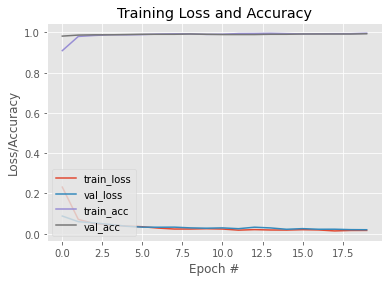

In [24]:
plotter(20,32,H,testX,testY,model,1)

In [26]:
#serializing history map into a file for later use
import pickle
history_file = open(rootdir + 'history_0ly_20_EPOCHS_Adam', 'wb') 
pickle.dump(H.history, history_file) 
history_file.close()